## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_L1_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l1_ratio=1e-4):
    input_layer=keras.layers.Input(input_shape)
    for i,num in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(input_layer)
        else :
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(x)
        
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output_layer')(x)    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_L2_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l2_ratio=1e-4):
    input_layer=keras.layers.Input(input_shape)
    for i,num in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l2(l2_ratio))(input_layer)
        else :
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l2(l2_ratio))(x)
        
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output_layer')(x)    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_L1_L2_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l1_ratio=1e-4,l2_ratio=1e-4):
    input_layer=keras.layers.Input(input_shape)
    for i,num in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else :
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
        
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output_layer')(x)    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
EPOCHS=50
LR=0.0001
RATIOS_1=[1e-2,1e-4,1e-8]
RATIOS_2=[1e-2,1e-4,1e-8]
REGULARIZERS=['l1','l2']

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, l in enumerate(REGULARIZERS):
    for r1 in RATIOS_1 :
        keras.backend.clear_session() # 把舊的 Graph 清掉
        
        if i==0 :
            print(f"Experiment with {l} Regulizer and ratio = {r1}")
            model = build_L1_mlp(input_shape=x_train.shape[1:], l1_ratio=r1)
        if i==1 :
            print(f"Experiment with {l} Regulizer and ratio = {r1}")
            model = build_L2_mlp(input_shape=x_train.shape[1:], l2_ratio=r1)

        model.summary()
        optimizer=keras.optimizers.Adam(lr=LR)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train,y_train,epochs=EPOCHS,validation_data=[x_test,y_test],batch_size=256,shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = f"exp-{l}-{r1}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with l1 Regulizer and ratio = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

In [8]:



for r1 in RATIOS_1 :
    for r2 in RATIOS_2:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with {l} Regulizer and L1 ratio = {r1} , L2 reatio={r2}")
        model = build_L1_L2_mlp(input_shape=x_train.shape[1:],l1_ratio=r1 ,l2_ratio=r2)
        model.summary()
        optimizer=keras.optimizers.Adam(lr=LR)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train,y_train,epochs=EPOCHS,validation_data=[x_test,y_test],batch_size=256,shuffle=True)
        
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]                
            
        exp_name_tag = f"exp-{l}-{r1}-{r2}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
            
        
        

Experiment with l2 Regulizer and L1 ratio = 0.01 , L2 reatio=0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000

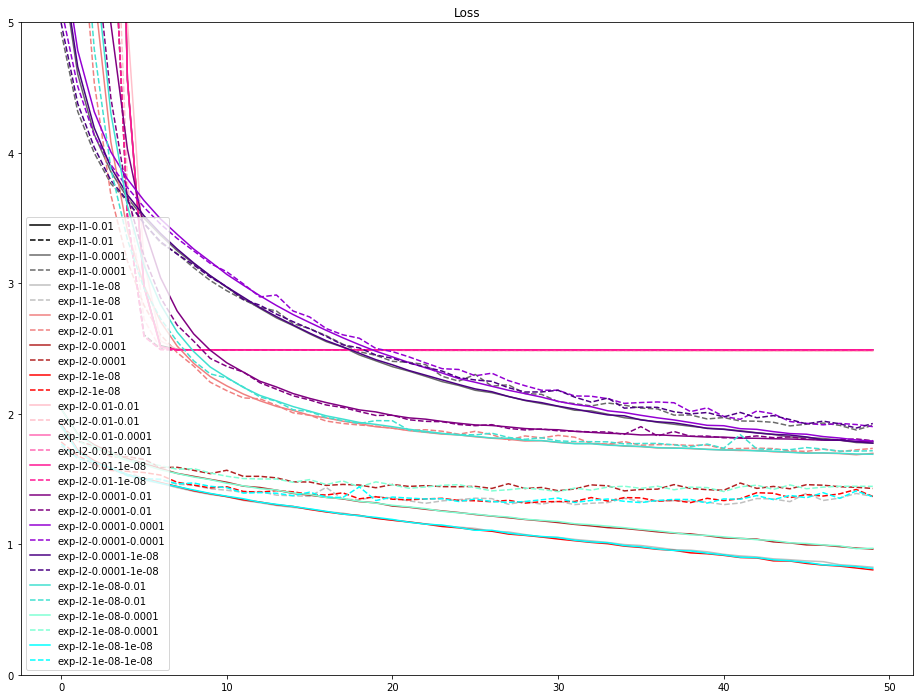

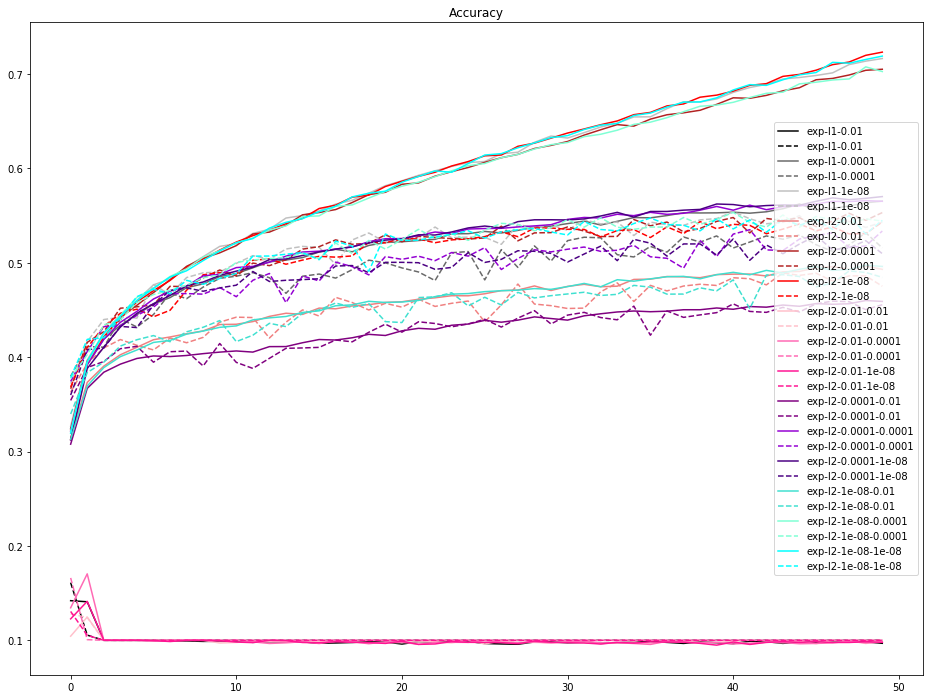

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["black", "dimgray", "silver", "lightcoral", "firebrick", "red","pink","hotpink","deeppink","purple","darkviolet",'indigo','turquoise','aquamarine','aqua']

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()